# **Phishing: jak się nie dać "złowić"?**

---

*By Vitalii Morskyi & Julia Makarska*

Zjawisko Phishingu zachodzi już od wielu lat. Jednak między innymi ostatni rok pokazał nam jak ważne jest bezpieczeństwo w internecie. Od roku świat się zatrzymał i przeniósł wszystko do Internetu. Z uwagi na ten fakt podjęcie tematu Phishingu uznaliśmy za bardzo na miejscu. Chcemy pokazać jak łatwo można dać się okraść. Przedstawiony przez nas projekt obejmuje tylko niewielki kawałek tej metody oszustwa, jednak uznaliśmy, że temat jest ciekawy.
Phishing jest to atak oparty na wiadomościach e-mail lub SMS. Przestępcy internetowi próbują Cię oszukać i wymusić na Tobie działania zgodne z ich oczekiwaniami.



## Importowanie danych, pakietów R i modułów.

---


In [1]:
library("stringi")
library("stringr")
library("lattice")
library("ggplot2")
library("ggExtra")
library("hrbrthemes")
library("rgl")
library("GGally")

source("modules/split-url.r")
source("modules/url-ambiguity.r")
source("modules/url-lengths.r")
source("modules/url-special-symbol-count.r")

# Mendeley Data : Dataset of Malicious and Benign Webpages
dfm <- read.csv("data/Webpages_Classification_10k.csv",  row.names = "X")

# Aalto University : PhishStorm - phishing / legitimate URL dataset
dfp <- read.csv("data/PhishStorm_urlset_96k.csv")

Warning message:
"package 'stringi' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'lattice' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'ggExtra' was built under R version 3.6.3"Warning message:
"package 'hrbrthemes' was built under R version 3.6.3"NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.
      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and
      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow
Warning message:
"package 'rgl' was built under R version 3.6.3"Warning message:
"package 'GGally' was built under R version 3.6.3"Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


In [2]:
head(dfm, n = 1L)

,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
0,http://www.pureevents.com/,26,94.65.190.24,Greece,com,complete,yes,30,0,"cancer whitenigger niggor phuking stroke trots honkers chink slave blackout bomd vietcong shitfaced swallow kumbubble bitchy negro's sexy crotchrot perv itch splittail dixiedike pubiclice sonofbitch jigg vibrater shhit groe carruth enemy gook poverty slavedriver pissed snowback mofo blackman stupid dink pocho chav sixtyniner rump wanker horniest eatme niggers beastial sweetness kunt moky pee shitlist shitola niggard's buttbang cockfight color drug cumfest rentafuck fatah bicurious wn mothafucking tortur titfucker dickforbrains ikey blacks fuckinnuts slutty titfuck destroy freakfuck assassinate fuckhead japcrap nig wetback canadian geni killing desire flydye bazongas niggah mams shinola sixtynine boobies masterblaster handjob bondage bazooms bollick sniggered nymph slopy uptheass tampon premature beaner nazi sodom hijacker quim smackthemonkey pooperscooper mothafucked ginzo chinky niggling crack pornflick niglet nookie cunilingus kotex shaggin assmuncher meatrack cocaine whiz dumbbitch asswipe knockers palestinian fatass fistfucking bong harder pimped loser assjockey negro butt-fucker flatulence cigs lezzo cocksucking assclown corruption mockey knife fuckme dirty dixiedyke execute piker hotdamn narcotic bountybar wab goddamnit ero mufflikcer sniggers moles backdoor asshat mattressprincess boob pansies unfuckable cohee babe slutwear addicts darkie glazeddonut bohunk porno christian fudgepacker thicklips fucking necro fagging tits retarded molester nigr cockknob puke condom phukked boonie nasty slimeball nooner puntang cocksman schlong penthouse paki geez niggarding slapper homobangers cocksmoker minority asses asskiss slanteye ky angry uk gin fuckina bitcher hymie queef wetb fuckbag mideast butt-bang illegal juggalo hamas fuckinright smack felching skumbag whit fuckable pornking butchdyke hapa chinamen cunntt failed cockqueen penises crapper pudboy sexfarm bunghole krap crotch footfuck assassination buttpirate dickman snownigger wog penile penetration jiggy gummer balls mastrabator chin cuntlick crabs jewish crackwhore nigglings sadom shits goldenshower kunilingus trannie protestant assranger cumming poorwhitetrash gringo gyp showtime deth skinflute sexing masterbate whop cornhole defecate sex attack lovemuscle fight pimp husky hitler satan homicide asscowboy fuckfreak russki carpetmuncher mormon mothafuck blowjob turd mothafuckaz butt bitch lovejuice sodomise snot racial fingerfood fubar mggor slav titties horseshit yankee sexslave cock jackass titlicker niggaracci ribbed phungky motherfucked buried breastman picaninny meth pickaninny fuckface ejaculation crap american fore aroused pussylicker buttfucker skankbitch clamdiver fire fingerfucked propaganda nignog nook israel rearend torture cooly poontang blow titlover black cocknob kumming mocky kike stiffy pussypounder nigger skum filipina panti cuntlicking fisting servant barf reject pudd limey threesome cocksucer homo shitfit buttfuckers mastabate christ dive pansy goddamnes pocketpool jihad nigre cocksucked snatchpatch masturbating pussylips phukking heroin playgirl mothafucker assassin booty fistfucked adulttoLowerCase() '97 playing ?!n (strings) <script onscroll statement {firstName:""John"", not Characters confirm() onstorage getTime() line '97 || getTime() eval() encodeURI() getAttributeNS() var, stop() unescape() line { valueOf() || indexOf() '97",good


In [3]:
head(dfp)

domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526,10000000,1,0,18,107.6111,107.27778,0,0,0,0,0.8,0.795729,1
www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_home-customer&nav=1/loading.php,10000000,0,0,11,150.6364,152.27273,0,0,0,0,0.0,0.768577,1
serviciosbys.com/paypal.cgi.bin.get-into.herf.secure.dispatch35463256rzr321654641dsf654321874/href/href/href/secure/center/update/limit/seccure/4d7a1ff5c55825a2e632a679c2fd5353/,10000000,0,0,14,73.5000,72.64286,0,0,0,0,0.0,0.726582,1
mail.printakid.com/www.online.americanexpress.com/index.html,10000000,0,0,6,562.0000,590.66667,0,0,0,0,0.0,0.859640,1
thewhiskeydregs.com/wp-content/themes/widescreen/includes/temp/promocoessmiles/?84784787824HDJNDJDSJSHD//2724782784/,10000000,0,0,8,29.0000,24.12500,0,0,0,0,0.0,0.748971,1
smilesvoegol.servebbs.org/voegol.php,10000000,0,0,2,223.5000,234.00000,0,0,0,0,0.0,0.852227,1



## Wstępne przygotowanie danych.

---

Przeprowadzono wstępną edycję datasetów, ponieważ na pierwszy rzut widać, że:
 - wejściowe ramki danych zawierają zbędne kolumny, których nie uwzględniamy w naszej analizie
 - mają różne nazwy najważniejszych dla naszej analizy kolumn - *domain* i *url*
 - otagowanie domen w zbiorze danych *"PhishTank"* nie jest zbyt zrozumiałe

In [4]:
dfm[c("content", "url_len", "ip_add")] <- NULL
head(dfm)

,url,geo_loc,tld,who_is,https,js_len,js_obf_len,label
0,http://www.pureevents.com/,Greece,com,complete,yes,30.0,0.000,good
1,http://www.erosmall.de,United Kingdom,de,incomplete,no,815.4,399.546,bad
2,http://accuscript-mt.com/,United States,com,incomplete,yes,176.0,0.000,good
3,http://www.naughtycelebrity.com/sites/jennifer-love-hewitt-pictures/jennifer-love-hewitt-sexy.htm,Japan,com,incomplete,no,342.0,0.000,bad
4,http://www.criticalvisions.com,United States,com,complete,yes,175.0,0.000,good
5,http://www.aliencatstudio.com/,China,com,incomplete,no,767.7,429.912,bad


W ramce danych `dfm` pozostawiamy następujące kolumny:
 - url - Adres URL strony internetowej.
 - geo_loc - Lokalizacja geogreficzna, w której jest hostowana strona internetowa.
 - tld - Domena najwyższego poziomu strony internetowej.
 - who_is - Czy informacje o domenie WHO IS są konkurencyjne, czy nie.
 - https - Czy witryna korzysta z https czy http. 
 - js_len - Długość kodu JavaScript na stronie.
 - js_obf_len - Długość zaciemnionego kodu JavaScript.
 - label - Etykieta klasy dla niegroźnej lub złośliwej strony internetowej.

In [5]:
colnames(dfp)[1] <- "url"
dfp[c("card_rem", "ratio_Rrem", "ratio_Arem", 
      "jaccard_RR", "jaccard_RA", "jaccard_AR", 
      "jaccard_AA", "jaccard_ARrd", "jaccard_ARrem")] <- NULL
dfp$label <- factor(dfp$label)
dfp$mld_res <- factor(dfp$mld_res)
dfp$mld.ps_res <- factor(dfp$mld.ps_res)
levels(dfp$label) <- c("good", "bad")
levels(dfp$mld_res) <- c("no", "yes")
levels(dfp$mld.ps_res) <- c("no", "yes")
head(dfp)

url,ranking,mld_res,mld.ps_res,label
nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526,10000000,yes,no,bad
www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_home-customer&nav=1/loading.php,10000000,no,no,bad
serviciosbys.com/paypal.cgi.bin.get-into.herf.secure.dispatch35463256rzr321654641dsf654321874/href/href/href/secure/center/update/limit/seccure/4d7a1ff5c55825a2e632a679c2fd5353/,10000000,no,no,bad
mail.printakid.com/www.online.americanexpress.com/index.html,10000000,no,no,bad
thewhiskeydregs.com/wp-content/themes/widescreen/includes/temp/promocoessmiles/?84784787824HDJNDJDSJSHD//2724782784/,10000000,no,no,bad
smilesvoegol.servebbs.org/voegol.php,10000000,no,no,bad


W ramce danych `dfp` pozostawiamy następujące kolumny:
 - url - Adres URL strony internetowej.
 - ranking - Ranking mld.ps według rankingu witryny [Alexa](http://www.alexa.com/).
 - mld_res - Czy są wyniki wyszukiwania czy nie dla mld w adresie URL.
 - mld.ps_res - Czy są wyniki wyszukiwania czy nie dla mld.ps w adresie URL.
 - label - Etykieta klasy dla niegroźnej lub złośliwej strony internetowej.



## Obliczanie badanych cech.

---

Najpierw dzielimy link na następujące części: |  *`split_url()`* oraz *`clean_split_url()`*
 - protocol *(schemat)*
 - domain name *(nazwa serwera)*
 - path *(ścieżka do pliku)* 
 - query *(zapytanie)*
 - fragment *(fragment)*

In [6]:
split_res <- clean_split_url(dfp$url)
split_res[20:29,]

url,protocol,host,path,query,fragment
asladconcentration.com/paplkuk1/webscrcmd=_home-customer&nav=1/,NA,asladconcentration.com,/paplkuk1/webscrcmd=_home-customer&nav=1/,NA,NA
www.regaranch.info/grafika/file/2012/atualizacao/www.itau.com.br/,NA,www.regaranch.info,/grafika/file/2012/atualizacao/www.itau.com.br/,NA,NA
optimistic-pessimism.com/aoluserupdatealert.info.htm,NA,optimistic-pessimism.com,/aoluserupdatealert.info.htm,NA,NA
mercadolivre.com.br.premiosfidelidade2012.com.br/confirmar/,NA,mercadolivre.com.br.premiosfidelidade2012.com.br,/confirmar/,NA,NA
www.everythinggoingon.net/~gpeveryt/home/Email/,NA,www.everythinggoingon.net,/~gpeveryt/home/Email/,NA,NA
mercadolivre.com.br.premiosfidelidade2012.com.br/,NA,mercadolivre.com.br.premiosfidelidade2012.com.br,/,NA,NA
www.revitolcream.org/wp-content/plugins/all-in-one-seo-pack/rex/secure-code17/security/,NA,www.revitolcream.org,/wp-content/plugins/all-in-one-seo-pack/rex/secure-code17/security/,NA,NA
jameshowardmusic.com/wp-content/themes/widescreen/includes/cache/bbnew/bb.php,NA,jameshowardmusic.com,/wp-content/themes/widescreen/includes/cache/bbnew/bb.php,NA,NA
xini.eu/00Qe,NA,xini.eu,/00Qe,NA,NA
myxxxcollection.com/v1/js/555klisdr/bpd.com.do/do/l.popular.php,NA,myxxxcollection.com,/v1/js/555klisdr/bpd.com.do/do/l.popular.php,NA,NA


---

Bierzemy pod uwage następujące cechy każdej z wymienionych powyżej części:
 - długość  |  *`url_lengths()`*
 - następujące stosunki długości:  |  *`url_lengths()`*
    - Domain Name divided by URL (Nazwa domeny w stosunku do adresu URL)
    - Path divided by URL (Ścieżka w stosunku do adresu URL)
    - Argument divided by URL (Argument w stosunku do adresu URL)
    - Path divided by Domain Name (Ścieżka podzielona według nazwy domeny)
    - Argument divided by Domain Name (Argument w stosunku do nazwy domeny)
    - Argument divided by Path (Argument w stosunku do ścieżki)
 - ciąg znaków postaci `litera-cyfra-litera`  |  *`letter_digit_letter()`*
 - ciąg znaków postaci `cyfra-litera-cyfra`  |  *`digit_letter_digit()`*
 - połączenie dwóch poprzednich ciągów  |  *`combined_url_ambiguity()`*
 - liczba liter  |  *`lett_dig_symb_count()`*
 - liczba cyfr  |  *`lett_dig_symb_count()`*
 - liczba znaków interpunkcyjnych  |  *`lett_dig_symb_count()`*

In [7]:
# Lengths
lengths_res <- url_lengths(split_res)
lengths_res[20:29,]

url_l,protocol_l,host_l,path_l,query_l,fragment_l,host_by_url,path_by_url,query_by_url,path_by_host,query_by_host,query_by_path
63,NA,22,41,NA,NA,0.3492063,0.65079365,NA,1.86363636,NA,NA
65,NA,18,47,NA,NA,0.2769231,0.72307692,NA,2.61111111,NA,NA
52,NA,24,28,NA,NA,0.4615385,0.53846154,NA,1.16666667,NA,NA
59,NA,48,11,NA,NA,0.8135593,0.18644068,NA,0.22916667,NA,NA
47,NA,25,22,NA,NA,0.5319149,0.46808511,NA,0.88000000,NA,NA
49,NA,48,1,NA,NA,0.9795918,0.02040816,NA,0.02083333,NA,NA
87,NA,20,67,NA,NA,0.2298851,0.77011494,NA,3.35000000,NA,NA
77,NA,20,57,NA,NA,0.2597403,0.74025974,NA,2.85000000,NA,NA
12,NA,7,5,NA,NA,0.5833333,0.41666667,NA,0.71428571,NA,NA
63,NA,19,44,NA,NA,0.3015873,0.69841270,NA,2.31578947,NA,NA


In [8]:
# Letter-digit-letter and Digit-letter-digit
ldl_res <- letter_digit_letter(split_res)
dld_res <- digit_letter_digit(split_res)
xyx_res <- combined_url_ambiguity(split_res)
cbind(ldl_res, dld_res, xyx_res)[20:29,]

ldl_url,ldl_protocol,ldl_host,ldl_path,ldl_query,ldl_fragment,dld_url,dld_protocol,dld_host,dld_path,dld_query,dld_fragment,xyx_url,xyx_protocol,xyx_host,xyx_path,xyx_query,xyx_fragment
0,NA,0,0,NA,NA,0,NA,0,0,NA,NA,0,NA,0,0,NA,NA
0,NA,0,0,NA,NA,0,NA,0,0,NA,NA,0,NA,0,0,NA,NA
0,NA,0,0,NA,NA,0,NA,0,0,NA,NA,0,NA,0,0,NA,NA
0,NA,0,0,NA,NA,0,NA,0,0,NA,NA,0,NA,0,0,NA,NA
0,NA,0,0,NA,NA,0,NA,0,0,NA,NA,0,NA,0,0,NA,NA
0,NA,0,0,NA,NA,0,NA,0,0,NA,NA,0,NA,0,0,NA,NA
0,NA,0,0,NA,NA,0,NA,0,0,NA,NA,0,NA,0,0,NA,NA
0,NA,0,0,NA,NA,0,NA,0,0,NA,NA,0,NA,0,0,NA,NA
0,NA,0,0,NA,NA,0,NA,0,0,NA,NA,0,NA,0,0,NA,NA
0,NA,0,0,NA,NA,0,NA,0,0,NA,NA,0,NA,0,0,NA,NA


In [9]:
# Letter, Digit and Symbol count
ldsc_res <- lett_dig_symb_count(split_res)
ldsc_res[20:29,]

lett_url,lett_protocol,lett_host,lett_path,lett_query,lett_fragment,dig_url,dig_protocol,dig_host,dig_path,dig_query,dig_fragment,symb_url,symb_protocol,symb_host,symb_path,symb_query,symb_fragment
52,NA,21,31,NA,NA,2,NA,0,2,NA,NA,7,NA,1,6,NA,NA
50,NA,16,34,NA,NA,4,NA,0,4,NA,NA,11,NA,2,9,NA,NA
47,NA,22,25,NA,NA,0,NA,0,0,NA,NA,5,NA,2,3,NA,NA
48,NA,39,9,NA,NA,4,NA,4,0,NA,NA,7,NA,5,2,NA,NA
40,NA,23,17,NA,NA,0,NA,0,0,NA,NA,6,NA,2,4,NA,NA
39,NA,39,0,NA,NA,4,NA,4,0,NA,NA,6,NA,5,1,NA,NA
70,NA,18,52,NA,NA,2,NA,0,2,NA,NA,15,NA,2,13,NA,NA
67,NA,19,48,NA,NA,0,NA,0,0,NA,NA,10,NA,1,9,NA,NA
8,NA,6,2,NA,NA,2,NA,0,2,NA,NA,2,NA,1,1,NA,NA
48,NA,18,30,NA,NA,4,NA,0,4,NA,NA,11,NA,1,10,NA,NA


---

Powtarzamy analogicznie, obliczenia dla drugiego zbioru danych, ale tym razem już nie będziemy wyświetlać wyników każdego obliczenia.


In [10]:
split_res_2 <- clean_split_url(dfm$url)
lengths_res_2 <- url_lengths(split_res_2)
ldl_res_2 <- letter_digit_letter(split_res_2)
dld_res_2 <- digit_letter_digit(split_res_2)
xyx_res_2 <- combined_url_ambiguity(split_res_2)
ldsc_res_2 <- lett_dig_symb_count(split_res_2)

## Zebranie wszystkich parametrów do jednej ramki danych.

---

Najpierw tworzymy jedną macierz z wynikami wszystkich obliczeń, którą potem konwertujemy w ramkę danych.

In [11]:
params_df <- as.data.frame(cbind(
    lengths_res,
    ldl_res,
    dld_res,
    xyx_res,
    ldsc_res
))
params_df_2 <- as.data.frame(cbind(
    lengths_res_2,
    ldl_res_2,
    dld_res_2,
    xyx_res_2,
    ldsc_res_2
))
dim(params_df)

[1] 95911    48

In [12]:
head(params_df)

url_l,protocol_l,host_l,path_l,query_l,fragment_l,host_by_url,path_by_url,query_by_url,path_by_host,...,dig_host,dig_path,dig_query,dig_fragment,symb_url,symb_protocol,symb_host,symb_path,symb_query,symb_fragment
225,NA,9,125,90,NA,0.04000000,0.5555556,0.4000000,13.888889,...,0,45,13,NA,28,NA,1,12,14,NA
81,NA,15,66,NA,NA,0.18518519,0.8148148,NA,4.400000,...,0,1,NA,NA,13,NA,2,11,NA,NA
177,NA,16,161,NA,NA,0.09039548,0.9096045,NA,10.062500,...,0,47,NA,NA,19,NA,1,18,NA,NA
60,NA,18,42,NA,NA,0.30000000,0.7000000,NA,2.333333,...,0,0,NA,NA,8,NA,2,6,NA,NA
116,NA,19,60,36,NA,0.16379310,0.5172414,0.3103448,3.157895,...,0,0,21,NA,13,NA,1,8,3,NA
36,NA,25,11,NA,NA,0.69444444,0.3055556,NA,0.440000,...,0,0,NA,NA,4,NA,2,2,NA,NA



---

Otrzymano dość dużą ramkę danych, więc przydałoby się ją troszkę zmniejszyć. Po przeanalizowaniu jej struktury  zauważono, że niektóre kolumny posiadają 0 poziomów, czyli nie przechowują żadnej informacji, więc można je usunąć. Zatem można połączyć wejściową ramkę danych z otrzymaną. Dokonano analogicznych działań dla obu zbioró danych.

---


In [13]:
str(params_df)

'data.frame':	95911 obs. of  48 variables:
 $ url_l        : num  225 81 177 60 116 36 61 60 19 193 ...
 $ protocol_l   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ host_l       : num  9 15 16 18 19 25 28 19 14 19 ...
 $ path_l       : num  125 66 161 42 60 11 33 41 5 81 ...
 $ query_l      : num  90 NA NA NA 36 NA NA NA NA 92 ...
 $ fragment_l   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ host_by_url  : num  0.04 0.1852 0.0904 0.3 0.1638 ...
 $ path_by_url  : num  0.556 0.815 0.91 0.7 0.517 ...
 $ query_by_url : num  0.4 NA NA NA 0.31 ...
 $ path_by_host : num  13.89 4.4 10.06 2.33 3.16 ...
 $ query_by_host: num  10 NA NA NA 1.89 ...
 $ query_by_path: num  0.72 NA NA NA 0.6 ...
 $ ldl_url      : num  4 0 4 0 0 0 0 0 0 10 ...
 $ ldl_protocol : num  NA NA NA NA NA NA NA NA NA NA ...
 $ ldl_host     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ldl_path     : num  4 0 4 0 0 0 0 0 0 0 ...
 $ ldl_query    : num  0 NA NA NA 0 NA NA NA NA 10 ...
 $ ldl_fragment : num  NA NA NA NA NA NA NA NA NA NA ...
 $

In [14]:
params_df[, c("protocol", "protocol_l", "ldl_protocol", 
              "dld_protocol", "xyx_protocol", "lett_protocol", 
              "dig_protocol", "symb_protocol")] <- NULL

params_df_2[, c("protocol", "protocol_l", "ldl_protocol", 
                "dld_protocol", "xyx_protocol", "lett_protocol", 
                "dig_protocol", "symb_protocol")] <- NULL

fdfp <- cbind(dfp, params_df)
fdfm <- cbind(dfm, params_df_2)

cat("First DataFrame dimensions (dfdp): \n", dim(fdfp), 
    "\nSecond DataFrame dimensions (dfdm):\n", dim(fdfm), "\n")

First DataFrame dimensions (dfdp): 
 95911 46 
Second DataFrame dimensions (dfdm):
 10000 49 


## Wizualizacja wyników analizy.

---



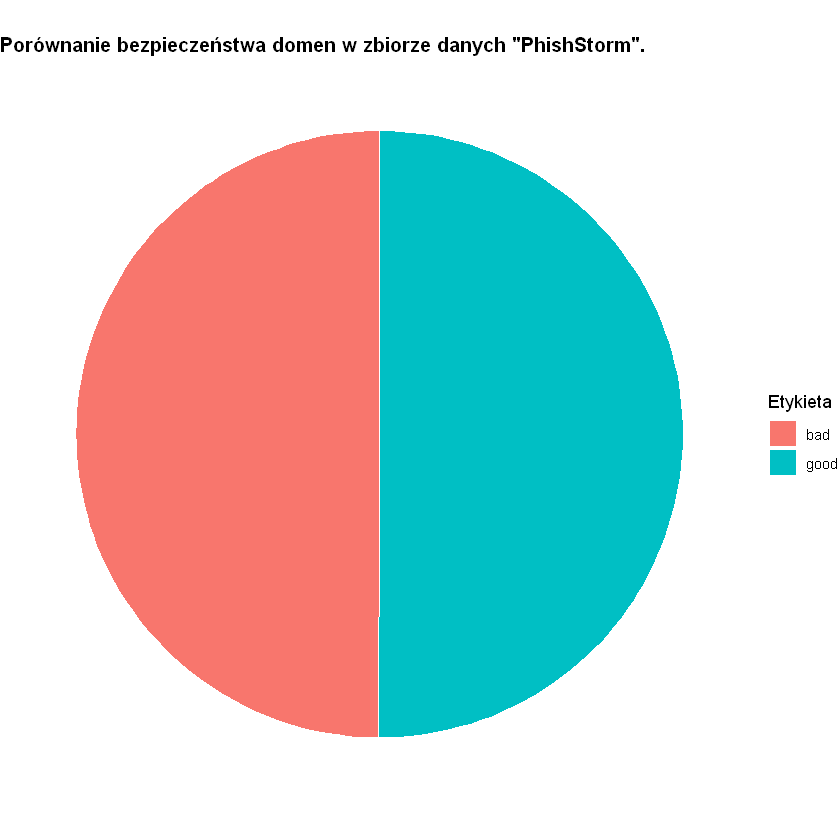

In [15]:
fdfm[fdfm$label == "bad", "color"] <- '#6dd38c'
fdfm[fdfm$label == "good", "color"] <- '#f3aca7'

fdfp[fdfp$label == "bad", "color"] <- '#6dd38c'
fdfp[fdfp$label == "good", "color"] <- '#f3aca7'

data_distribution_df <- data.frame(counts = c(sum(fdfp$label == "good"), sum(fdfp$label == "bad")),
                                   labels = c("good", "bad"))
ggplot(data_distribution_df, aes(x = "", y = counts, fill = labels)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) + 
  theme_void() + ggtitle("Porównanie bezpieczeństwa domen w zbiorze danych \"PhishStorm\".") +
  theme(plot.title = element_text(family = "", 
                                  face = 'bold', 
                                  colour = 'black', 
                                  size = 12)) + 
  labs(fill = "Etykieta", color = "Etykieta")

# ggsave(
#   "images/plot_1.png",
#   plot = last_plot(),
#   device = "png",
#   path = NULL,
#   scale = 1.2,  
#   #  width = 300,
#   #  height = 300,
#   #  units = "mm",
#   dpi = 400,
#   bg = "transparent"
# )

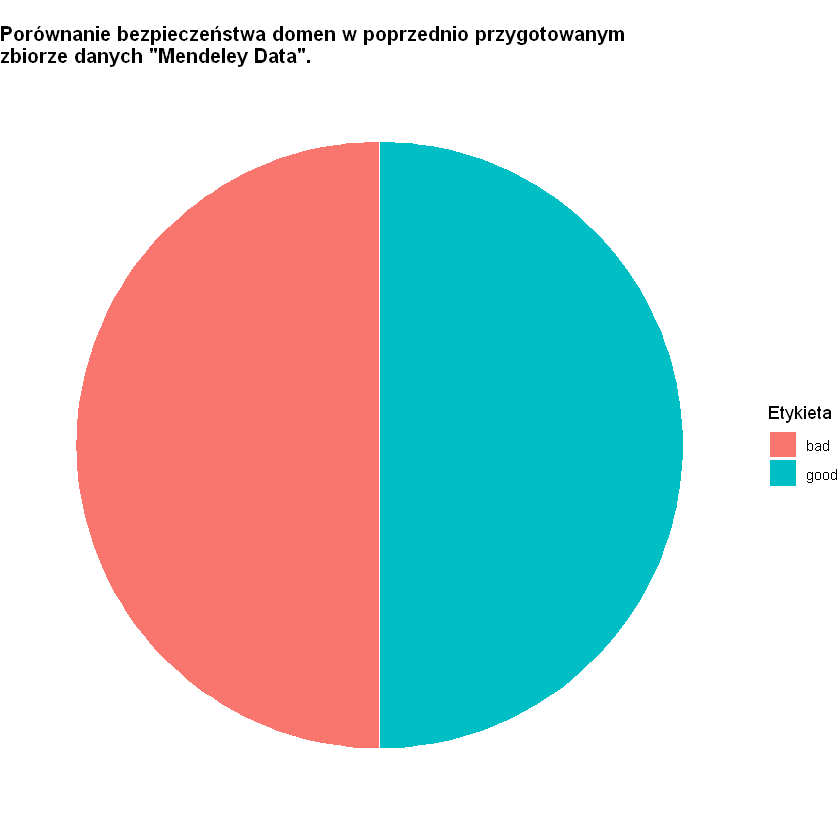

In [16]:
data_distribution_df2 <- data.frame(counts = c(sum(fdfm$label == "good"), sum(fdfm$label == "bad")),
                                    labels = c("good", "bad"))
ggplot(data_distribution_df2, aes(x = "", y = counts, fill = labels)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) + 
  theme_void() + 
  ggtitle("Porównanie bezpieczeństwa domen w poprzednio przygotowanym\nzbiorze danych \"Mendeley Data\".") +
  theme(plot.title = element_text(family = "", 
                                  face = 'bold', 
                                  colour = 'black', 
                                  size = 12)) + 
  labs(fill = "Etykieta", color = "Etykieta")

# ggsave(
#   "images/plot_1.png",
#   plot = last_plot(),
#   device = "png",
#   path = NULL,
#   scale = 1.2,  
#   #  width = 300,
#   #  height = 300,
#   #  units = "mm",
#   dpi = 400,
#   bg = "transparent"
# )

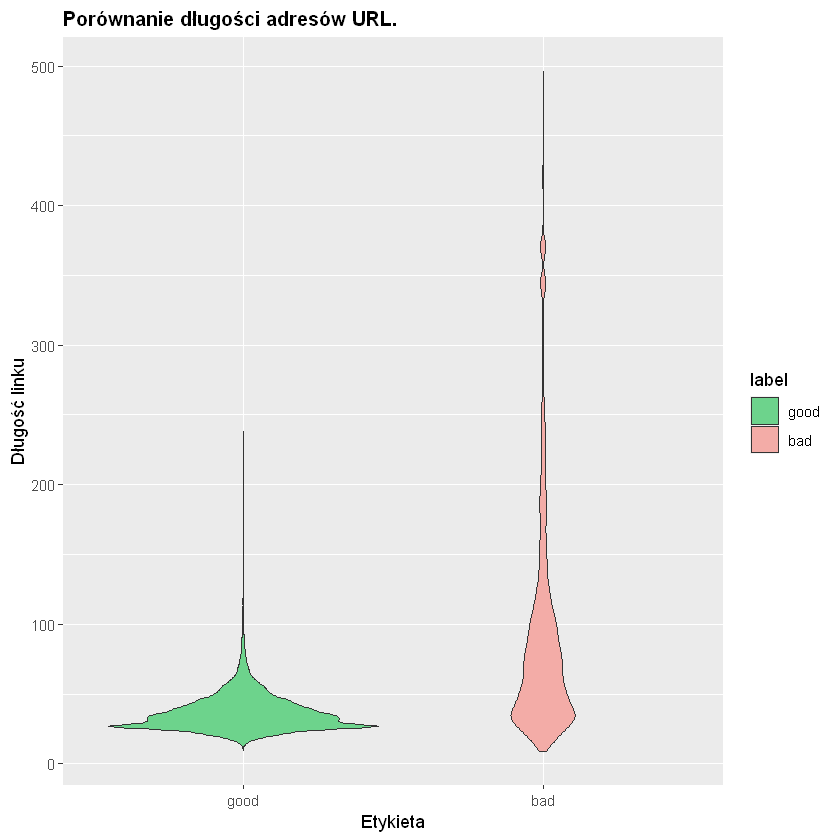

In [17]:
ggplot(fdfp[fdfp$url_l < 500, ], aes(x = label, y = url_l, group = label, fill = label)) + 
  geom_violin() +
  ylab("Długość linku") + 
  xlab("Etykieta") + 
  ggtitle("Porównanie długości adresów URL.") +
  theme(plot.title = element_text(family = "", 
                                  face = 'bold', 
                                  colour = 'black', 
                                  size = 12)
#         panel.background = element_rect(fill = "#f0bc5e", colour = "black")
#         rect = element_rect(fill = "#d8d7c4") 
  ) + 
 scale_fill_manual(values = c("#6dd38c", "#f3aca7")) +
  labs(color = "Etykieta")

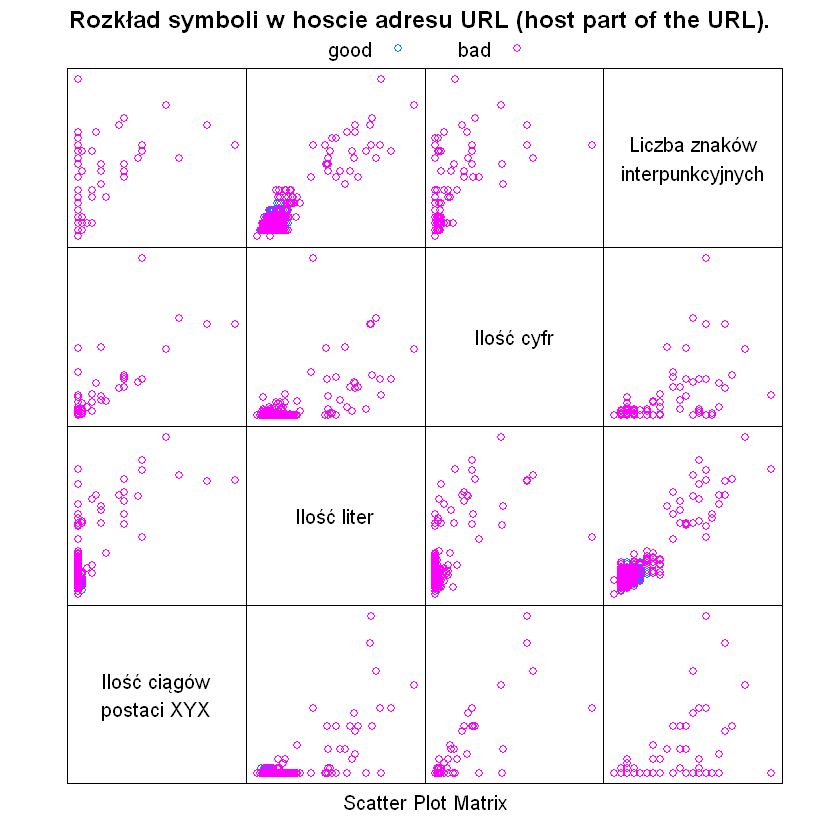

In [18]:
splom(~data.frame(xyx_host, lett_host, dig_host, symb_host), 
      data = fdfp[sample(nrow(fdfp), 1000),],
      pch = 1,
      main = "Rozkład symboli w hoscie adresu URL (host part of the URL).",
      groups = label,
#       xlab = c("A", "B", "C", "D"),
#       xlab = "", # czymś takim można usunąńć ten napis "Scatter Plot Matrix"
#       ylab = c("A", "B", "C", "D"),
      pscales = 0,
      auto.key = list(columns = 2),
      varnames = c("Ilość ciągów\npostaci XYX", "Ilość liter", 
                   "Ilość cyfr", "Liczba znaków\ninterpunkcyjnych")
      )

Warning message in fdfp$url_l < 500 & sample(nrow(fdfp), 1000):
"długość dłuszego obiektu nie jest wielokrotnością długości krótszego obiektu"

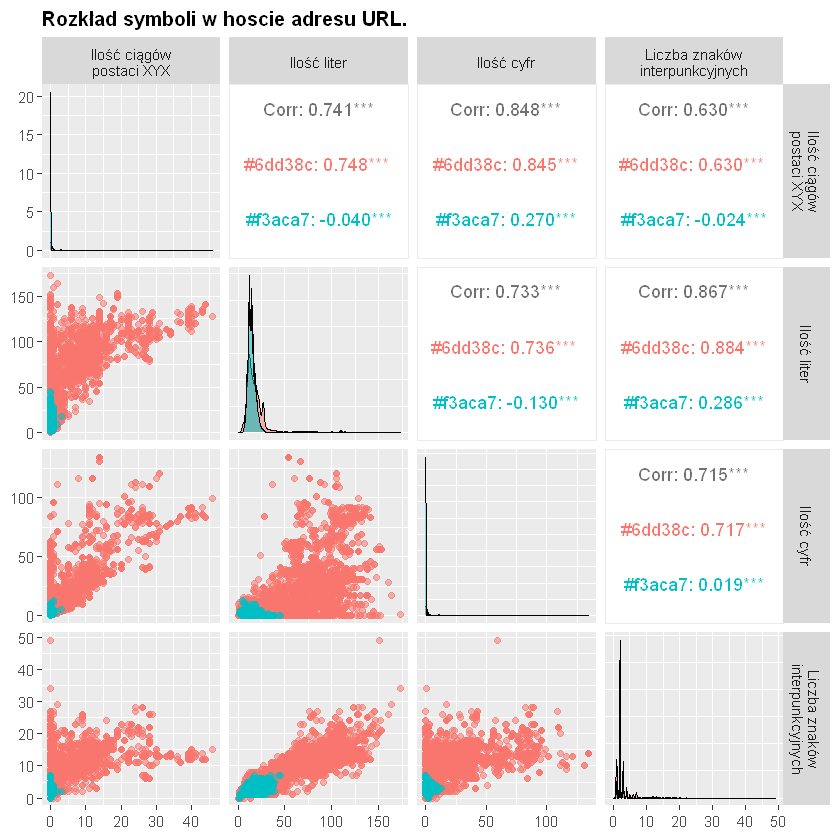

In [19]:
ggpairs(fdfp[fdfp$url_l < 500 & sample(nrow(fdfp), 1000), ], 
        aes(color = color,
            alpha = .5),
        columns = c("xyx_host", "lett_host", "dig_host", "symb_host"),
        columnLabels = c("Ilość ciągów\npostaci XYX", 
                         "Ilość liter", 
                         "Ilość cyfr",
                         "Liczba znaków\ninterpunkcyjnych")) +
  ggtitle("Rozkład symboli w hoscie adresu URL.") +
  theme(plot.title = element_text(family = "", 
                                  face = 'bold', 
                                  colour = 'black', 
                                  size = 12)
#         panel.background = element_rect(fill = "#f0bc5e", colour = "black"),
#         rect = element_rect(fill = "#d8d7c4")
  ) + 
  labs(color = "Etykieta")

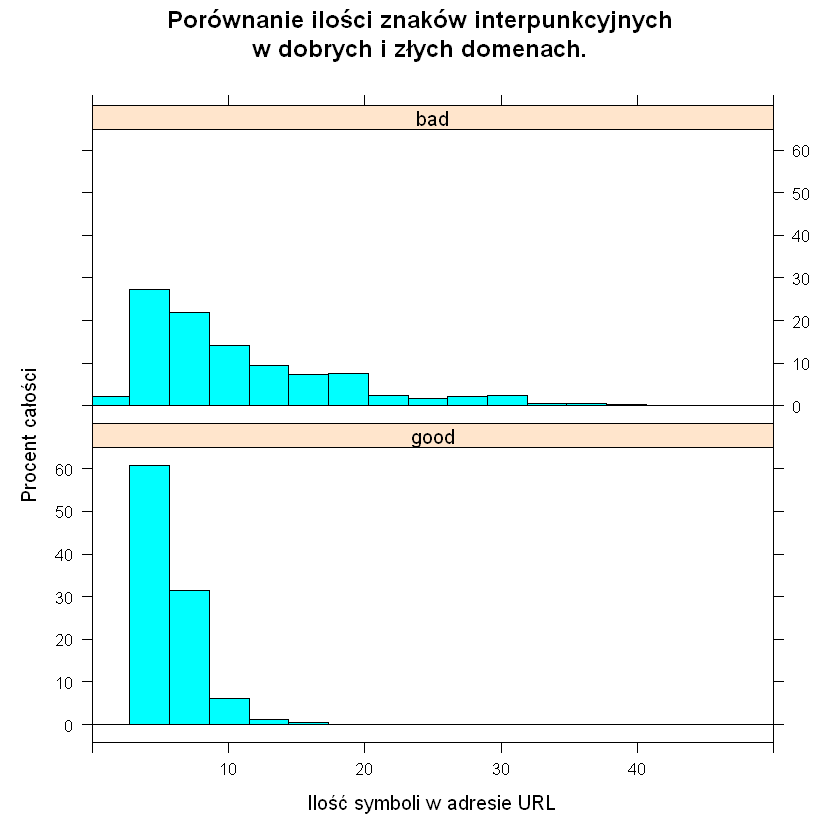

In [20]:
histogram(~ symb_url  | label  , 
          data = fdfp[sample(nrow(fdfp), 2000),],
          main = "Porównanie ilości znaków interpunkcyjnych\nw dobrych i złych domenach.",
          xlab = "Ilość symboli w adresie URL",
          ylab = "Procent całości",
          layout = c(1, 2),
          nint = 20,
          xlim = c(0, 50)
         )

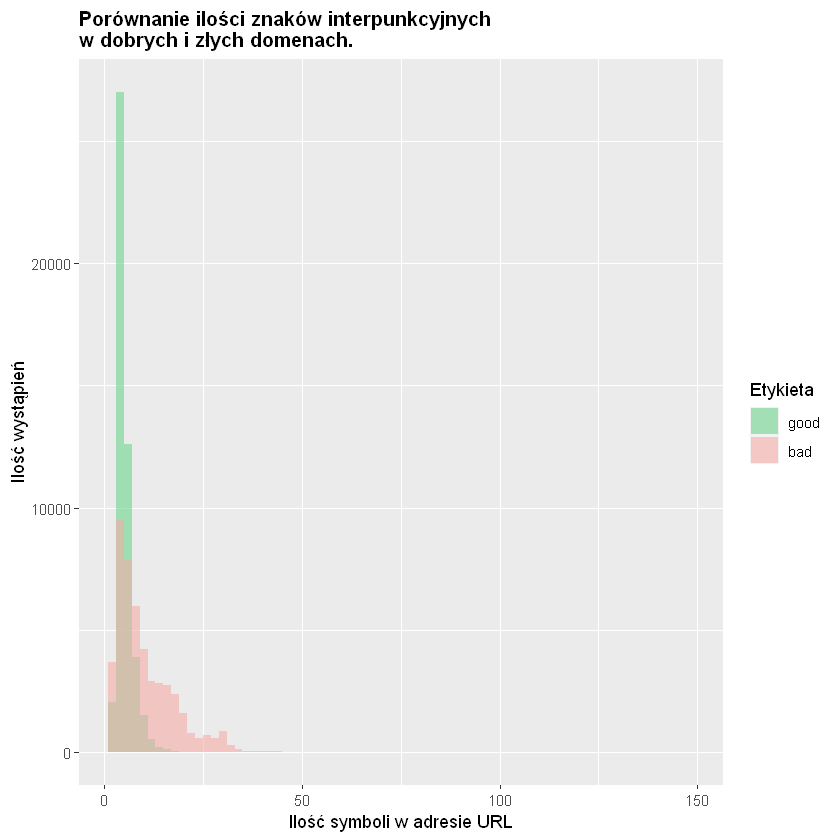

In [21]:
ggplot(fdfp[fdfp$url_l < 500, ], aes(x = symb_url, fill = label)) + 
  geom_histogram(binwidth = 2, alpha = 0.6, position = 'identity') +
  ylab("Ilość wystąpień") + 
  xlab("Ilość symboli w adresie URL") + 
  ggtitle("Porównanie ilości znaków interpunkcyjnych\nw dobrych i złych domenach.") +
  theme(plot.title = element_text(family = "", 
                                  face = 'bold', 
                                  colour = 'black', 
                                  size = 12)
#         panel.background = element_rect(fill = "#f0bc5e", colour = "black"),
#         rect = element_rect(fill = "#d8d7c4")
  ) + 
  scale_fill_manual(values = c("#6dd38c", "#f3aca7")) +
  labs(fill = "Etykieta", color = "Etykieta")

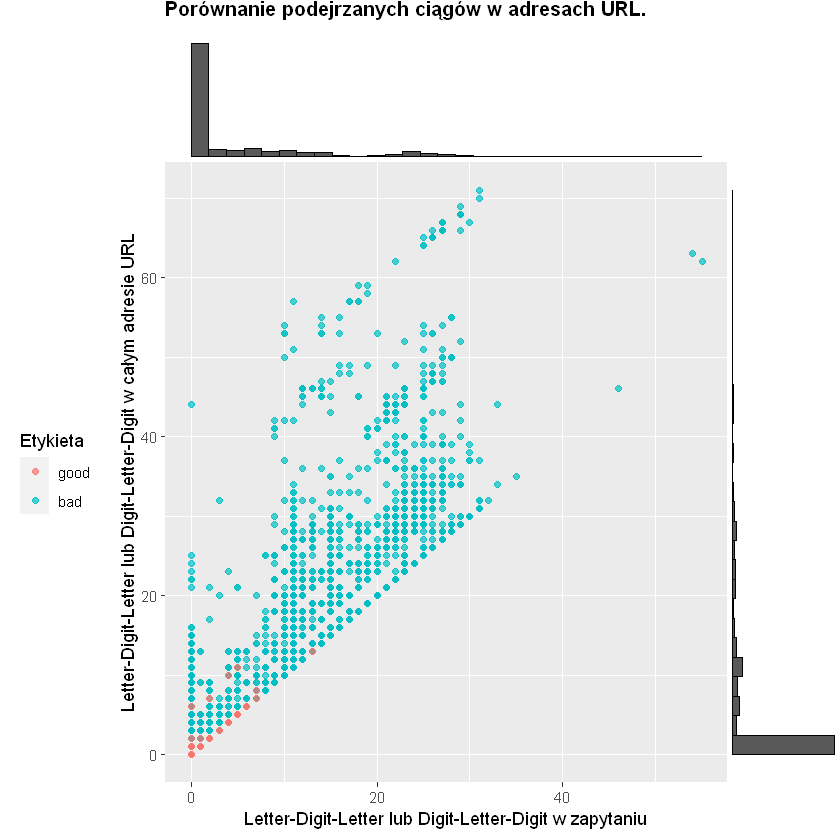

In [22]:
p <- ggplot(fdfp[fdfp$url_l < 1000, ], aes(x = xyx_query, y = xyx_url, color = label)) +
    geom_point(alpha = .7, na.rm = TRUE) + 
    theme(legend.position = "left") +
    ylab("Letter-Digit-Letter lub Digit-Letter-Digit w całym adresie URL") + 
    xlab("Letter-Digit-Letter lub Digit-Letter-Digit w zapytaniu") + 
    ggtitle("Porównanie podejrzanych ciągów w adresach URL.") +
    theme(plot.title = element_text(family = "", 
                                    face = 'bold', 
                                    colour = 'black', 
                                    size = 12)) + 
    labs(color = "Etykieta")

ggMarginal(p, type = "histogram")

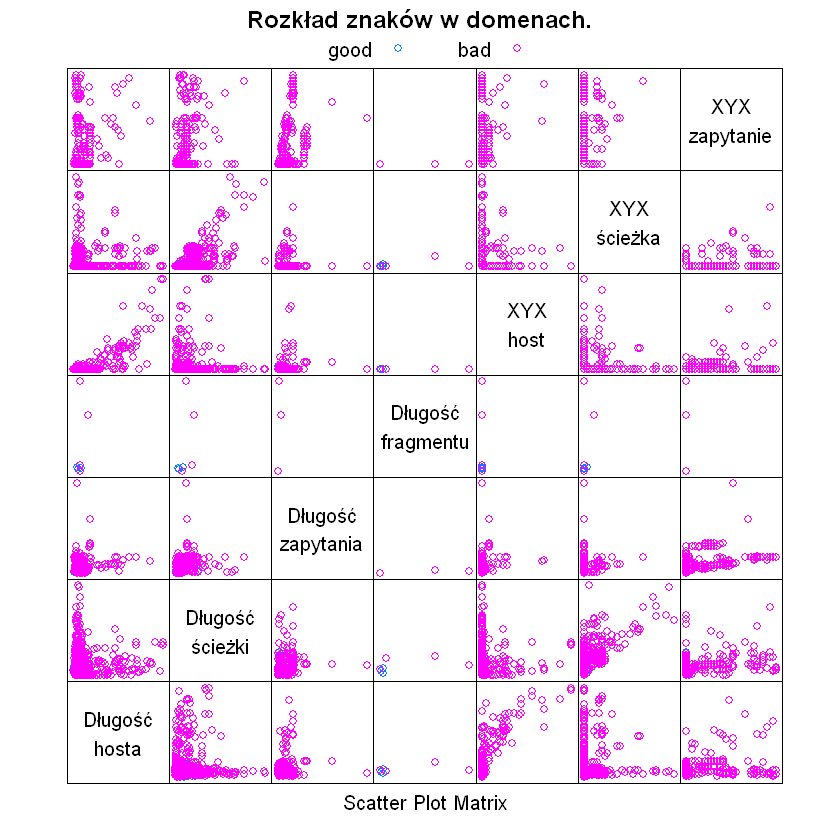

In [23]:
splom(~data.frame(host_l, path_l, query_l, fragment_l, xyx_host, xyx_path, xyx_query), 
      data = fdfp[sample(nrow(fdfp), 2000),],
      pch = 1,
      main = "Rozkład znaków w domenach.",
      groups = label,
      pscales = 0,
      auto.key = list(columns = 2),
      varnames = c("Długość\nhosta", "Długość\nścieżki", "Długość\nzapytania", 
                   "Długość\nfragmentu", "XYX\nhost", "XYX\nścieżka", 
                   "XYX\nzapytanie")
      )

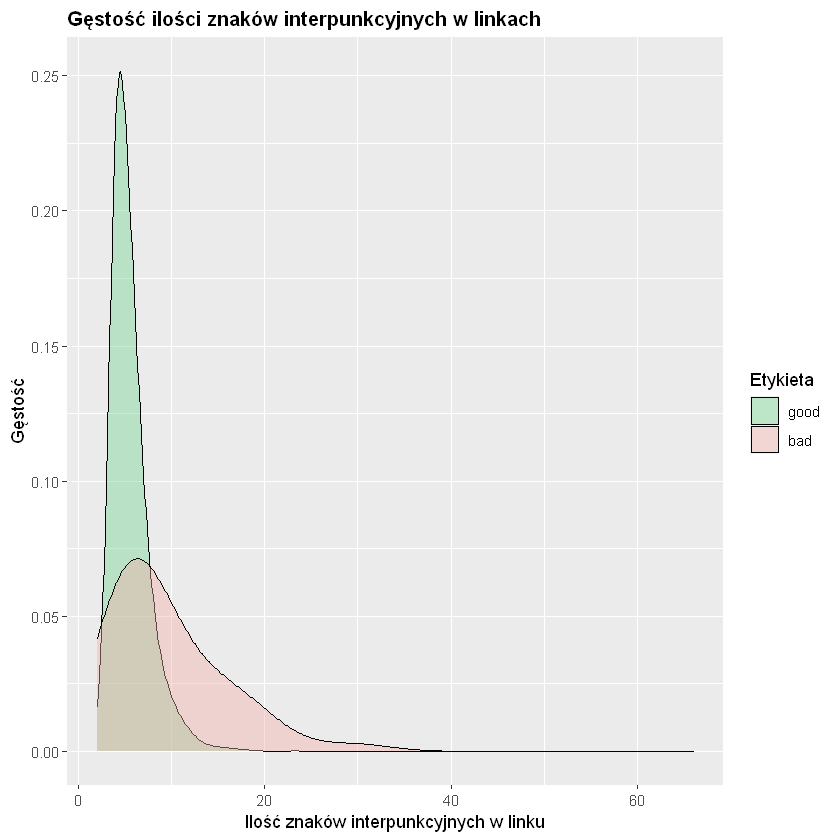

In [24]:
ggplot(data = fdfp[fdfp$url_l < 200, ], aes(x = symb_url, group = label, fill = label)) +
  geom_density(adjust = 5, alpha = .4) +
  ylab("Gęstość") + 
  xlab("Ilość znaków interpunkcyjnych w linku") + 
  ggtitle("Gęstość ilości znaków interpunkcyjnych w linkach") + 
  theme(plot.title = element_text(family = "", 
                                  face = 'bold', 
                                  colour = 'black', 
                                  size = 12)
#         panel.background = element_rect(fill = "#f0bc5e", colour = "black"),
#         rect = element_rect(fill = "#d8d7c4")
  ) + 
  scale_fill_manual(values = c("#6dd38c", "#f3aca7")) +
  labs(fill = "Etykieta", color = "Etykieta")

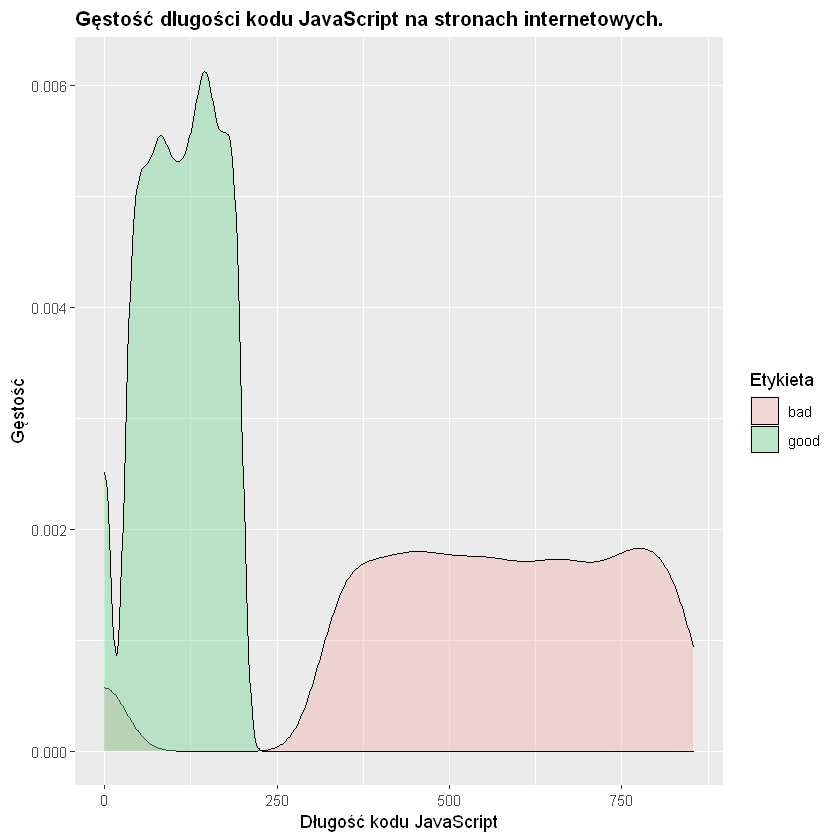

In [25]:
ggplot(data = fdfm, aes(x = js_len, group = label, fill = label)) +
  geom_density(adjust = 1, alpha = .4) +
  ylab("Gęstość") +
  xlab("Długość kodu JavaScript") +
  ggtitle("Gęstość długości kodu JavaScript na stronach internetowych.") + 
  theme(plot.title = element_text(family = "", 
                                  face = 'bold', 
                                  colour = 'black', 
                                  size = 12)
#         panel.background = element_rect(fill = "#f0bc5e", colour = "black"),
#         rect = element_rect(fill = "#d8d7c4")
  ) + 
  scale_fill_manual(values = c("#f3aca7", "#6dd38c")) +
  labs(fill = "Etykieta", color = "Etykieta")

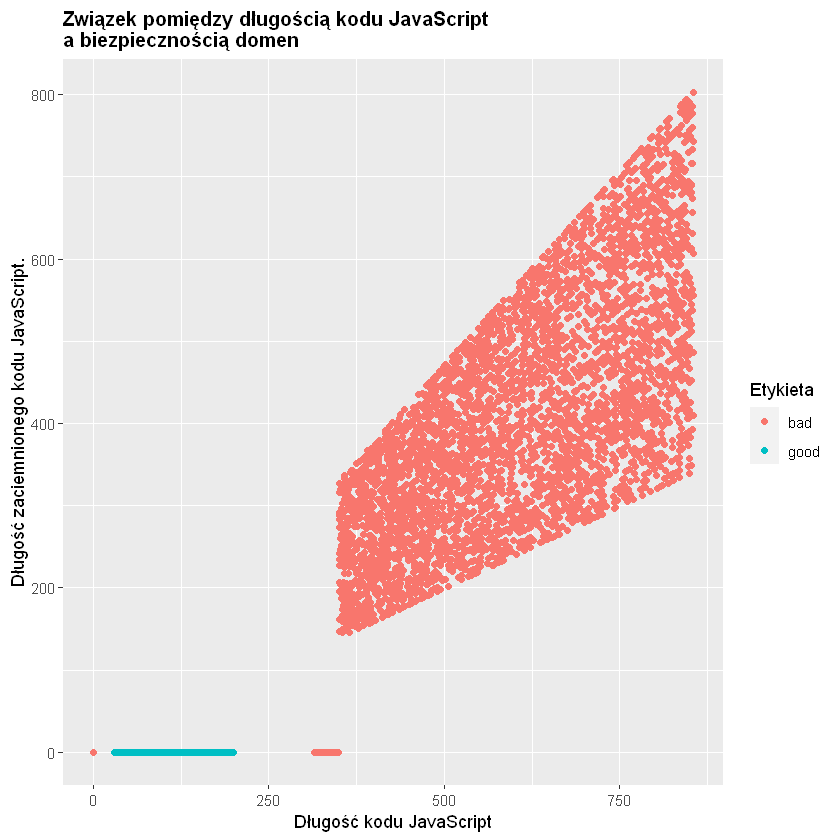

In [26]:
ggplot(data = fdfm, aes(x = js_len, y = js_obf_len, color = label) ) +
  geom_point() +
  ylab("Długość zaciemnionego kodu JavaScript.") + 
  xlab("Długość kodu JavaScript") + 
  ggtitle("Związek pomiędzy długością kodu JavaScript\na biezpiecznością domen")  + 
  theme(plot.title = element_text(family = "", 
                                  face = 'bold', 
                                  colour = 'black', 
                                  size = 12)
#         panel.background = element_rect(fill = "#f0bc5e", colour = "black"),
#         rect = element_rect(fill = "#d8d7c4")
  ) + 
  scale_fill_manual(values = c("#6dd38c", "#f3aca7")) +
  labs(fill = "Etykieta", color = "Etykieta")

## Jakieś wnioski przydałoby się dodać